# El método de Newton

El método de Newton (también llamado algoritmo de Newton-Raphson) constituye otro método numérico iterativo para encontrar raíces de una función $f$. 

Requiere más información, a saber la **derivada** $f'$,  pero a cambio suele funcionar mucho mejor. Derivaremos e implementaremos el método en este notebook. Por el momento, supondremos que el usuario provea también la derivada analítica de la función $f$, como otro argumento `df`; posteriormente en el curso, veremos cómo calcular derivadas numéricamente.

In [1]:
using Plots
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/4a9c8ae2369e127a11b7b64da32a2252ae982524-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/4a9c8ae2369e127a11b7b64da32a2252ae982524-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

#### Ejercicio 1 (Esta pregunta se lleva a cabo con papel y pluma)

Considera una función $f: \mathbb{R} \to \mathbb{R}$.
Supón que $x_0$ es una adivinanza inicial de una raíz, y que $x^*$ es la raíz exacta pero 
desconocida. Sigue los siguientes pasos para derivar el método de Newton.


(i) Supón que $x_0$ es suficientemente cercana a $x^*$. Define $\delta$ como la distancia (con signo) de $x_0$ desde $x^*$. 

$\delta=x-x0$

(ii) Escribe la ecuación que corresponde a que $x^*$ sea una raíz de la función, y exprésala en términos de $\delta$. 

si es raiz tenemos que $f(x+\delta)=0$ i.e. $f(x_{0})=\delta$

(iii) Desarrolla esta ecuación en una serie de Taylor a primer orden alrededor de $x_0$, para encontrar un valor aproximado de $\delta$.

$ f(x) \approx f(x_{0}) + f'(x_{0})(x-x_{0})+\frac{1}{2!}f''(x_{0})(x-x_{0})^{2} $

(iv) Así encuentra una ecuación para la siguiente aproximación a la raíz, $x_1 = x_0 + \delta$. 

$ x_1=x_0+(x-x_0) \Rightarrow  x=x_1$ y como la ecuacion de arriba $x$ es raiz igual a cero $\rightarrow$ que $f(x_1)=x_0-(f(x_0))/ f'(x_{0})$

(v) Por lo tanto, dada una adivinanza, podemos obtener otra que esperemos esté mejor (más cerca a la raíz). Escribe la misma ecuación que obtuviste en (iv), pero ahora para $x_{n+1}$ en términos de $x_n$. Esto es la regla general para el método de Newton.

$f(x_{n+1})=-\frac{f(x_n)} {f'(x_{n})}+x_{n}$

#### Ejercicio 2

Demuestra que el método Babilónico es un caso especial del método de Newton. [Pista: ¿Para cuál función $f$?]

sabemos que en el metodo babilonico teniamos que resolver para $f(x_{n+1})=x_{n}^2-y \Rightarrow f'(x_{n+1})=2x_{n}$ con lo que en newton tendriamos que $f(x_{n+1})=x_n-\frac{x_{n}}{2}+\frac{y}{2x}=\frac{1}{2}\frac{x_n-y}{x_n}$. Y recordando el metodo babilonico es tomar el punto medio entre $x_n$ y $\frac{y}{x_n}$

#### Ejercicio 3

(i) Escribe una función que implementa el método de Newton. Puedes suponer que el usuario provea tanto la función `f` como su derivada `df` como argumentos a la función `newton`, así como la condición inicial `x0`. [Posteriormente veremos cómo calcular derivadas con la computadora.] [NB: Si prefieres, puedes utilizar `f′` como nombre de la derivada, al teclear `f\prime<TAB>`. *No* se puede utilizar el apóstrofe aquí.]

In [2]:
function newton(f,df,x0)
    d=1
    err=0.00001
    iter=[]
    while err<d 
        x = x0 - f(x0)/df(x0)
        d= norm(x-x0)
        push!(iter,x)
    
        x0=x
    end
    return x0,iter
        
end

newton (generic function with 1 method)

In [3]:
x,v=newton(x->x^2,x->2*x,7)
x

6.67572021484375e-6

(ii) Para la función $x \mapsto x^2$, dibuja la dinámica del método de Newton, dada una función $f$ y una condición inicial $x_0$. Para hacerlo, dibuja una recta entre cada $(x_n, 0)$ y $(x_n, f(x_n))$, así como entre $(x_n, f(x_n)$ y $(x_{n+1}, 0)$. Hazlo interactivo con `Interact.jl` (dibujando los primeros $n$ pasos y cambiando $n$). Viendo la figura, interpreta geométricamente lo que está haciendo el método de Newton.

In [4]:
@manipulate for n = 1:5:length(v)
    p=plot(leg=false)
    f(x) = x^2
    df(x) = 2x 
    for i in 1:n
        p = plot!([v[i], v[i]], [0, f(v[i])],m='o')
        p = plot!([v[i], v[i+1]], [f(v[i]), 0],m='o')
    end
    p
end
    

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-167081c7-3cb7-4bcd-8cd6-394fe5740149", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 16),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 5),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 1)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 6, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":6}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {re

(iii) Aplica el método de Newton para encontrar raíces de distintas funciones. ¿Qué ocurre si empiezas con distintas condiciones iniciales?

Dependiendo de la condicion inicial es la raiz (cuando tiene mas de una) que encuentra

In [5]:
newton(x->x^2-4,x->2*x,-4)

(-2.000000000000002, Any[-2.5, -2.05, -2.00061, -2.0, -2.0])

In [6]:
newton(x->x^2-4,x->2*x,4)

(2.000000000000002, Any[2.5, 2.05, 2.00061, 2.0, 2.0])

In [7]:
function punto_medio(a,b,err)#pedimos un margen de error para obtener un punto medio mas certero
   s=1
    d1=0
    d2=0
    m=0
    while err<s
        m=(a+b)/2
        d1=norm(a-m) 
        d2=norm(b-m)
        s=norm(d1-d2)
    end
    return m
end
function biseccion(f,a,b,err)
    if f(a)*f(b)>=0
        return error #nos regresa error cuando las condiciones iniciales estan mal
    end
    iterados=[]
    c=punto_medio(a,b,err)
    if f(c)==0
         print("el punto medio es la raiz") #con las condiciones iniciales el primer punto medio 
        return c   #es la raiz
    
    else 
    while norm(f(c))>err
        if f(a)*f(c)<0 #tienen signos opuestos
            b=c   #a,b=a,c
            else 
            a=c     #a,b=c,b
        end
        c=punto_medio(a,b,err)
        push!(iterados,c)
    end
    return c, iterados #iv regresa los iterados en forma de vector
end
end

biseccion (generic function with 1 method)

#### Ejercicio 4

¿Qué tan rápido converge el método cuando esté cerca de una raíz? Corre el algoritmo utilizando `BigFloat`s para averiguarlo y graficar la convergencia. ¿El método de Newton es mejor que bisección? ¿Por qué (no)?



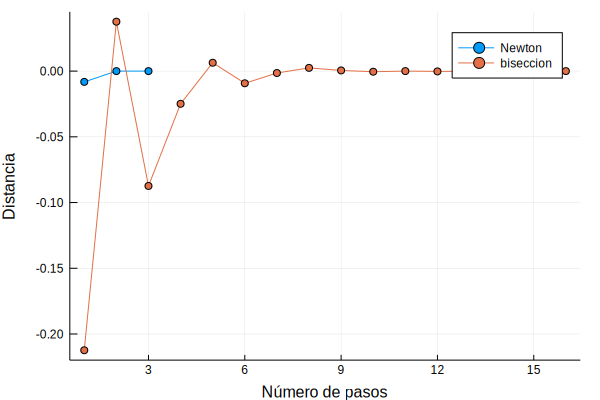

In [8]:
f(x)=cos(x)
df(x)=-sin(x)
raizb=BigFloat(biseccion(f,5,3,0.00001)[1])
distanciab=[BigFloat(biseccion(f,5,3,0.00001)[2][i]-raizb) for i in 1:length(biseccion(f,5,3,0.00001)[2])]
raizn = BigFloat(newton(f, df, 5)[1])
distancian = [BigFloat(newton(f, df, 5)[2][i] - raizn) for i in 1:length(newton(f, df, 5)[2])]
plot(distancian, m = "o", xlabel = "Número de pasos", ylabel = "Distancia", label = "Newton")
plot!(distanciab, m = "o", xlabel = "Número de pasos", ylabel = "Distancia", label = "biseccion")


Claramente el metodo de Newton converge más rapido

#### Ejercicio 5

Sin embargo, es posible que el método de Newton *no converja*, como sigue.

(i) El mismo código del método de Newton debería funcionar con números complejos. Utilízalo para encontrar raíces de la función $f(z) = z^3 -1$ **en el plano complejo**.
[Nota que la parte imaginaria $i = \sqrt{-1}$ se escribe como `im` en Julia. Hay funciones `real` e `imag` para extraer las partes reales e imaginarias de un número complejo.]

In [9]:
fz(z) = z^3 - 1
dfz(z) = 3*z^2
newton(fz,dfz,1)

(1.0, Any[1.0])

In [10]:
a,b=newton(fz,dfz,im)
a

-0.5 + 0.8660254037844387im

In [11]:
a1,b1=newton(fz,dfz,-im)
a1

-0.5 - 0.8660254037844387im

si funciona para las imaginarias y poniendo distintas condiciones nos da las 3 raices, que comparando con el resultado de wolfram, es correcto

(ii) Escribe una función que verifica si convergió después de un número dado de iterados. Si sí, regresa la parte imaginaria de la raíz a la cual convergió.

In [12]:
function verifica(f,df,x0,n)
    err=exp(-5)
    ncontador=0
    d=1
    #err=0.00001
    
    a=newton(f,df,x0)[1]
    while ncontador<n
    
        x = x0 - f(x0)/df(x0)
    
        x0=x
        
        ncontador=ncontador+1
    end
    if (norm(a-x0)<err)
            println("si convergio en \t ",n,"\t pasos")
            
      return imag.(x0)  
    else 
    println("no convergio en \t",n," \t pasos")
end
    
end
        
        

verifica (generic function with 1 method)

In [13]:
d=verifica(fz,dfz,im,10)


si convergio en 	 10	 pasos


0.8660254037844387

In [14]:
verifica(x->x^2,x->2x,2,10)

0.0

In [15]:
verifica(x->x^2,x->2x,2,5)

si convergio en 	 10	 pasos


(iii) Haz el cálculo para una malla de condiciones iniciales en el plano complejo alrededor de $0$. Dibuja la matriz correspondiente. ¿Qué observas? [Pista: Puedes utilizar una comprehensión de arreglo 2-dimensional.]

In [16]:
function verifica2(f,df,x0,n)
    err=exp(-5)
    ncontador=0
    d=1
    #err=0.00001
    
    a=newton(f,df,x0)[1]
    while ncontador<n
    
        x = x0 - f(x0)/df(x0)
    
        x0=x
        
        ncontador=ncontador+1
    end
    if (norm(a-x0)<err)
           # println("si convergio en \t ",n,"\t pasos")
            
      return imag.(x0)  
    else 
    #println("no convergio en \t",n," \t pasos")
end
    
end

verifica2 (generic function with 1 method)

no convergio en 	5 	 pasos


In [20]:
function mapa(r,f,df,n)
    m = zeros(n, n)
    
    dx = linspace(-r, r, n) 
    dy= linspace(-r, r, n) #hacemos el espacio

    for i in 1:n
       for j in 1:dx 
            m[i, j] = verifica2(f, df, dx[j] + im*dx[i], n)#aqui le damos parte imaginaria  
        end
    end
        
    plot(heatmap(dx, dy, m))
   # return g

    end

mapa (generic function with 1 method)

In [21]:
mapa(1,fz,dfz,100)

LoadError: [91mMethodError: no method matching colon(::Int64, ::#dfz)[0m
Closest candidates are:
  colon(::T<:Real, ::Any, [91m::T<:Real[39m) where T<:Real at range.jl:47
  colon(::A<:Real, ::Any, [91m::C<:Real[39m) where {A<:Real, C<:Real} at range.jl:14
  colon(::T, ::Any, [91m::T[39m) where T at range.jl:46
  ...[39m

#### Ejercicio 6

Considera ahora cómo encontrar raíces de un sistema de ecuaciones, escrito en forma vectorial:

$$\mathbf{f}(\mathbf{x}) = \mathbf{0}.$$

Repite un desarrollo siguiendo la pauta del ejercicio **1** en este contexto.
¿Qué es lo que cambia? ¿Qué tipo de operación numérica necesitaríamos para llevar a cabo el método de Newton en este nuevo contexto? [No es necesario que lo implementes por el momento -- opcional.]

Como ahora estamos trabajando en $\Re ^{n}\rightarrow \Re$ y tenemos que el método de newton es $\mathbf{f}(\vec{x}_{n+1} )=\vec{x_{0}}-\mathbf{f}(\vec{x}_{n} )\mathbf{D^{-1}(x)}$ donde est especie de derivada en varias, que, recordadno nuestras clases de cálculo este es la jacobiana inversa y como aún no sabemos invertir matrices creo no será necesario implementar este método.\\ Teniendo así nuestra expresion como:\\ $\mathbf{f}(\vec{x}_{n+1} )=\vec{x_{0}}-\mathbf{f}(\vec{x}_{n} )\mathbf{J^{-1}(x)}$ 